In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#Checking for Null Values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Exploratory Data Analysis

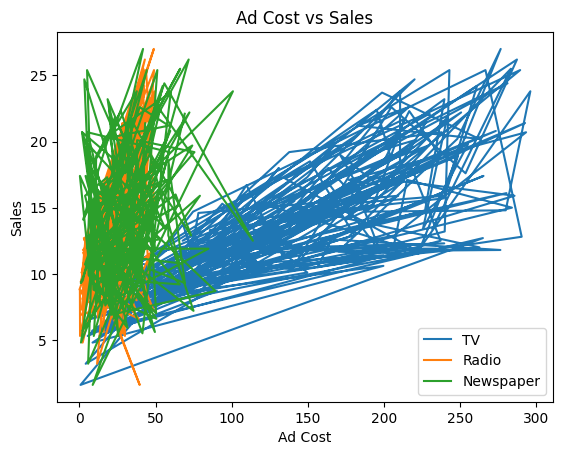

In [8]:
# Line charts ->> TV, Radio, and Newspaper costs against Sales
plt.plot(df["TV"], df["Sales"], label="TV")
plt.plot(df["Radio"], df["Sales"], label="Radio")
plt.plot(df["Newspaper"], df["Sales"], label="Newspaper")

# Adding labels and title to the plot
plt.xlabel("Ad Cost")
plt.ylabel("Sales")
plt.title("Ad Cost vs Sales")

# Show the legend
plt.legend()

# Show the plot
plt.show()

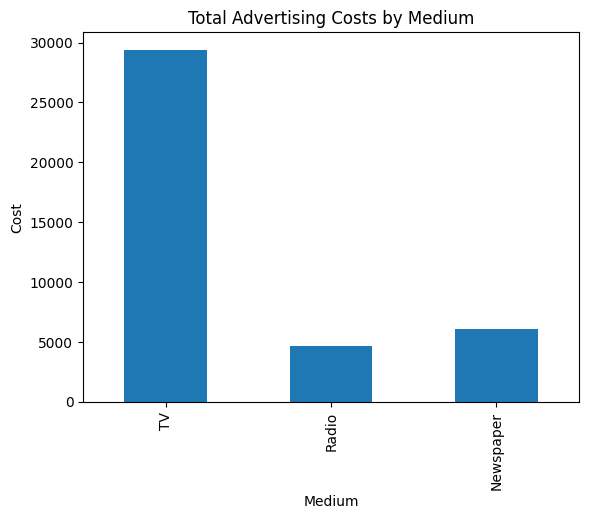

In [9]:
ad_costs = df[['TV', 'Radio', 'Newspaper']].sum()
ad_costs.plot(kind='bar')
plt.title('Total Advertising Costs by Medium')
plt.xlabel('Medium')
plt.ylabel('Cost')
plt.show()

In [ ]:
ad_costs = df[['TV', 'Radio', 'Newspaper']].sum()
ad_costs.plot(kind='bar')
plt.title('Total Sales by Medium')
plt.xlabel('Medium')
plt.ylabel('Sales')
plt.show()

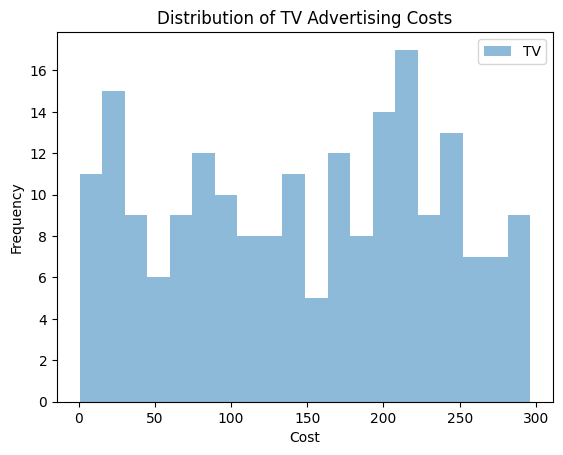

In [10]:
df[['TV']].plot(kind='hist', bins=20, alpha=0.5)
plt.title('Distribution of TV Advertising Costs')
plt.xlabel('Cost')
plt.show()

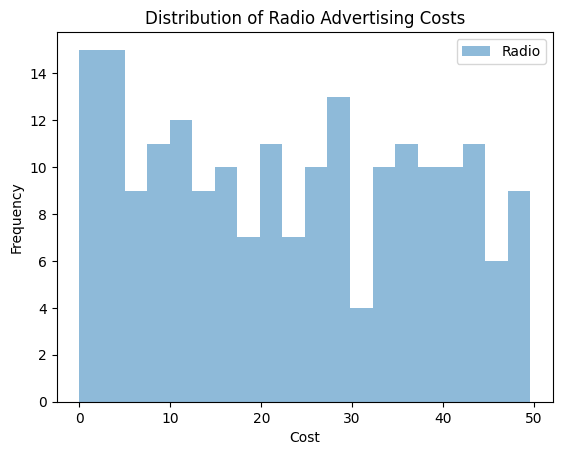

In [11]:
df[['Radio']].plot(kind='hist', bins=20, alpha=0.5)
plt.title('Distribution of Radio Advertising Costs')
plt.xlabel('Cost')
plt.show()

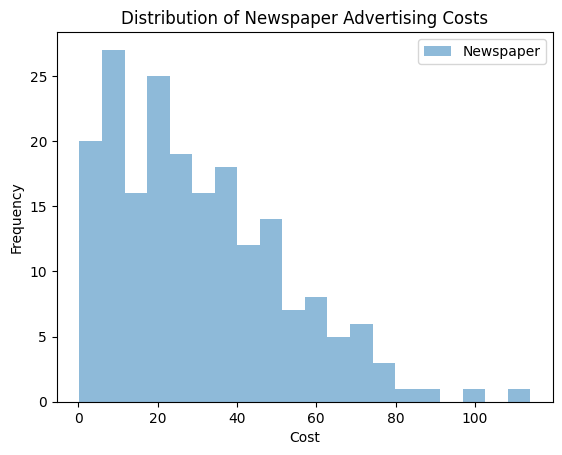

In [12]:
df[['Newspaper']].plot(kind='hist', bins=20, alpha=0.5)
plt.title('Distribution of Newspaper Advertising Costs')
plt.xlabel('Cost')
plt.show()

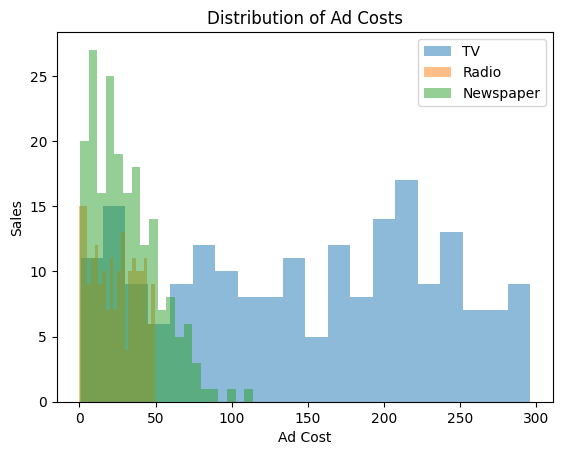

In [13]:
# Plot histograms of TV, Radio, and Newspaper costs
plt.hist(df["TV"], bins=20, alpha=0.5, label="TV")
plt.hist(df["Radio"], bins=20, alpha=0.5, label="Radio")
plt.hist(df["Newspaper"], bins=20, alpha=0.5, label="Newspaper")

# Add labels and title to the plot
plt.xlabel("Ad Cost")
plt.ylabel("Sales")
plt.title("Distribution of Ad Costs")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [29]:
df.describe()

,const,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.0,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.0,100.500000,147.042500,23.264000,30.554000,14.022500
std,0.0,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.0,1.000000,0.700000,0.000000,0.300000,1.600000
25%,1.0,50.750000,74.375000,9.975000,12.750000,10.375000
50%,1.0,100.500000,149.750000,22.900000,25.750000,12.900000
75%,1.0,150.250000,218.825000,36.525000,45.100000,17.400000
max,1.0,200.000000,296.400000,49.600000,114.000000,27.000000


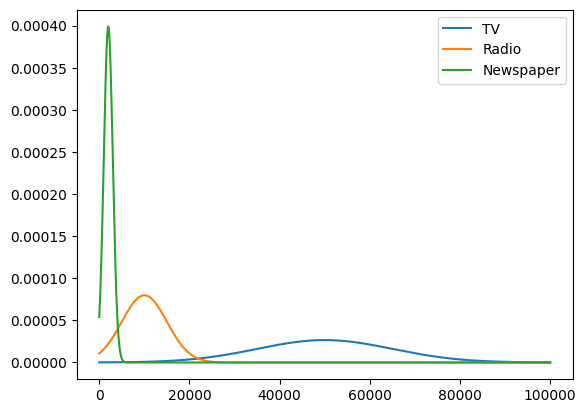

In [31]:
from scipy.stats import norm

# generate data
tv_mu, tv_sigma = 50000, 15000 # mean and standard deviation for TV ad costs
radio_mu, radio_sigma = 10000, 5000 # mean and standard deviation for radio ad costs
newspaper_mu, newspaper_sigma = 2000, 1000 # mean and standard deviation for newspaper ad costs

# generate x values
x = np.linspace(0, 100000, 1000)

# calculate pdf values for each category
tv_pdf = norm.pdf(x, tv_mu, tv_sigma)
radio_pdf = norm.pdf(x, radio_mu, radio_sigma)
newspaper_pdf = norm.pdf(x, newspaper_mu, newspaper_sigma)

# plot normal distribution curves
plt.plot(x, tv_pdf, label='TV')
plt.plot(x, radio_pdf, label='Radio')
plt.plot(x, newspaper_pdf, label='Newspaper')
plt.legend()
plt.show()

# Outliers

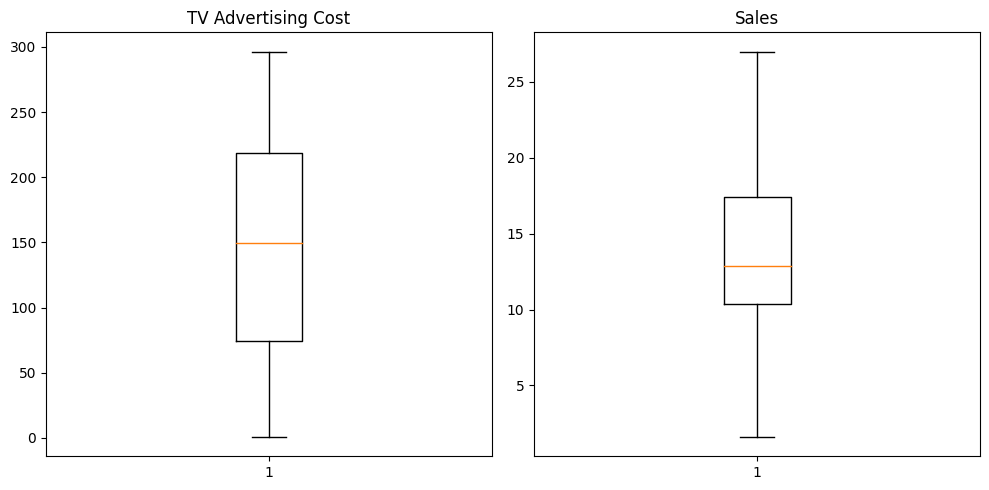

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["TV"])
plt.title("TV Advertising Cost")

plt.subplot(1,2,2)
plt.boxplot(df["Sales"])
plt.title("Sales")

plt.tight_layout()
plt.show()

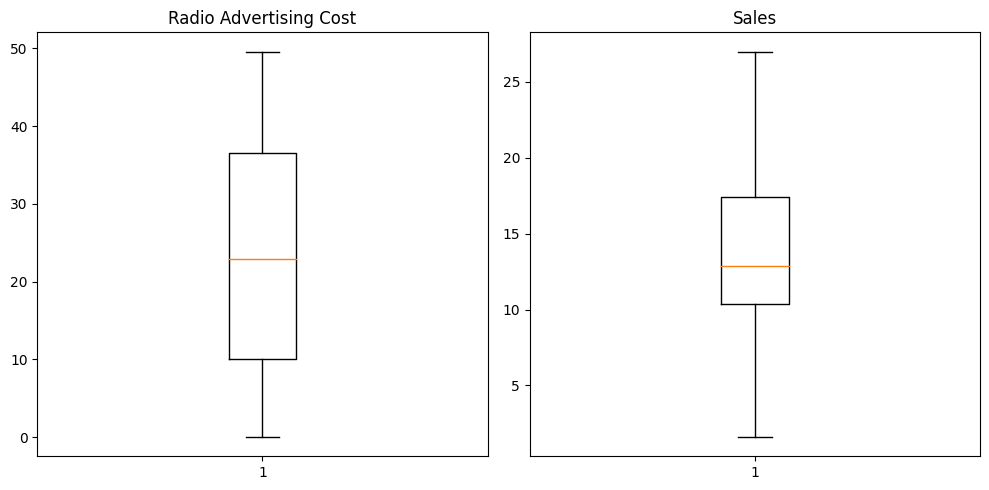

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Radio"])
plt.title("Radio Advertising Cost")

plt.subplot(1,2,2)
plt.boxplot(df["Sales"])
plt.title("Sales")

plt.tight_layout()
plt.show()

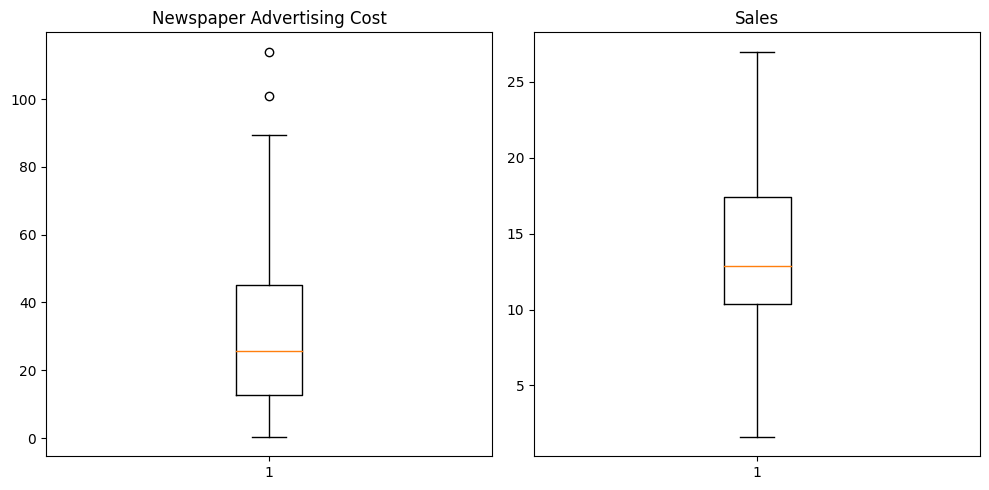

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df["Newspaper"])
plt.title("Newspaper Advertising Cost")

plt.subplot(1,2,2)
plt.boxplot(df["Sales"])
plt.title("Sales")

plt.tight_layout()
plt.show()

In [17]:
z_scores = np.abs(stats.zscore(df))
z_scores.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1.723412,0.969852,0.981522,1.778945,1.552053
1,1.706091,1.197376,1.082808,0.669579,0.696046
2,1.688771,1.516155,1.528463,1.783549,0.907406
3,1.671450,0.052050,1.217855,1.286405,0.860330
4,1.654129,0.394182,0.841614,1.281802,0.215683
5,1.636808,1.615408,1.731034,2.045930,1.310911
6,1.619488,1.045577,0.643905,0.324708,0.427043
7,1.602167,0.313437,0.247406,0.872487,0.158039
8,1.584846,1.616576,1.429069,1.360424,1.772059
9,1.567526,0.616043,1.395307,0.430582,0.657617


In [18]:
threshold = 3
outliers = np.where(z_scores > threshold)
outliers

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [19]:
outlier_mask = (z_scores > 3).any(axis=1)  # axis=1 checking for outliers across columns
outliers_df = df[outlier_mask]
outliers_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


# Relationship between ad costs and sales

<AxesSubplot: >

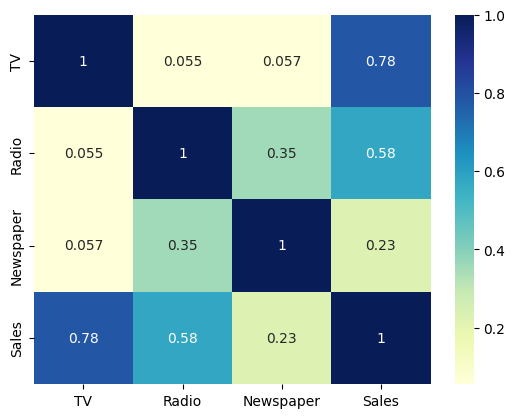

In [20]:
#Correlatio Matrix
corr = df[['TV','Radio','Newspaper','Sales']].corr()
sns.heatmap(corr, annot = True, cmap = "YlGnBu")

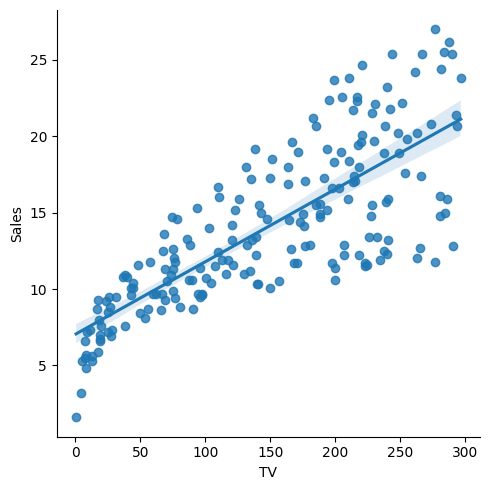

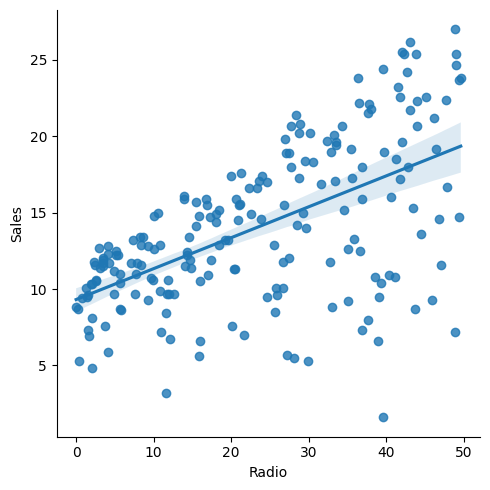

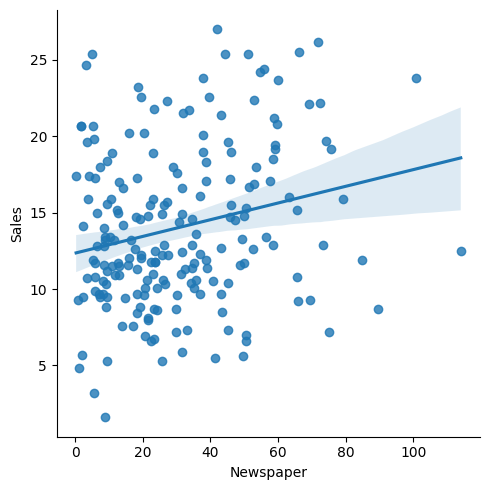

In [21]:
sns.lmplot(x="TV", y="Sales", data=df)
sns.lmplot(x="Radio", y="Sales", data=df)
sns.lmplot(x="Newspaper", y="Sales", data=df)

# Most Effective and efficient type of ad

In [22]:
# Add a constant to the dataframe to account for the intercept
df = sm.add_constant(df)

In [23]:
# Fit the multiple linear regression model
model = sm.OLS(df["Sales"], df[["const", "TV", "Radio", "Newspaper"]]).fit()

In [24]:
# Print a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        09:53:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Hypothesis Testing

In [34]:
from scipy.stats import pearsonr

# Perform Pearson correlation test between TV ad costs and sales
corr, p_value = pearsonr(df['TV'], df['Sales'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print('There is a statistically significant relationship between TV advertising expenditures and sales.')
else:
    print('There is no statistically significant relationship between TV advertising expenditures and sales.')


Correlation coefficient: 0.78
p-value: 0.0000
There is a statistically significant relationship between TV advertising expenditures and sales.


In [37]:
from scipy.stats import pearsonr

# Perform Pearson correlation test between ad costs and sales
corr, p_value = pearsonr(df['Newspaper'], df['Sales'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print('There is a statistically significant relationship between Newspaper advertising expenditures and sales.')
else:
    print('There is no statistically significant relationship between Newspaper advertising expenditures and sales.')

Correlation coefficient: 0.23
p-value: 0.0011
There is a statistically significant relationship between Newspaper advertising expenditures and sales.
